In [1]:
#keep the file safe, we will try to use this same dataset to do image analysis.

# ---- Regards, Amit

In [6]:
!pip install mlxtend
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
from mlxtend.data import loadlocal_mnist

X, y = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')


np.savetxt(fname='images.csv', 
           X=X, delimiter=',', fmt='%d')
np.savetxt(fname='labels.csv', 
           X=y, delimiter=',', fmt='%d')

In [4]:
#create the read_data file just by entering column names as X1 to X784 in excel and save it as image_data.csv
# also upload the file in the jupyter notebook.

In [38]:
data=pd.read_csv("images.csv")
print(data.head())
#data.iloc[0,:].to_numpy().reshape(28,28)


   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.608  0.609  0.610  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.611  0.612  0.613  0.614  0.615  0.616  0.617  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 784 columns]


In [40]:
labels=pd.read_csv("labels.csv", header=None)
print(labels.head())


   0
0  5
1  0
2  4
3  1
4  9


In [43]:
labels=labels.iloc[1:,:]
labels.head()

,0
1,0
2,4
3,1
4,9
5,2


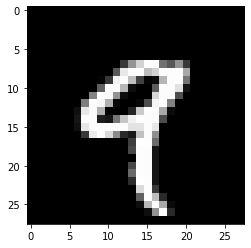

In [44]:
image= data.iloc[3].to_numpy().reshape(28,28)
plt.imshow(image, cmap='gray')

In [45]:
labels.head()

,0
1,0
2,4
3,1
4,9
5,2


In [46]:
# Test train split : PCA Data and Non PCA Data

from sklearn.model_selection import train_test_split

X_data, X_pca, y_data, y_pca= train_test_split(data,labels,test_size=0.2)


In [47]:
X_pca

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
9228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


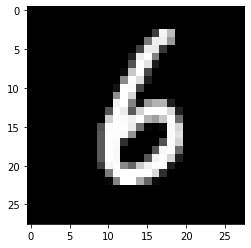

In [49]:
im=X_data.iloc[[6279]].to_numpy().reshape(28,28)
plt.imshow(im,cmap='gray')

In [52]:
y_data.iloc[[6279]]

,0
16436,6


In [5]:
#why were we doing PCA at all?
# save time

# will we save time is we have to do PCA first on all the data points?

# Reg only = 10s
# PCA + Reg = 10s + 3s = 13s


#divide the data - only a small sample for PCA
#use the complete data for regression only

In [53]:
# Import PCA module
from sklearn.decomposition import PCA
pca = PCA().fit(X_pca)

In [54]:
pca.n_components_

784

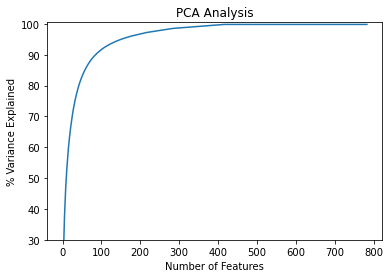

In [56]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborm-whitegrid')
plt.plot(var)

In [57]:
# Import PCA module. Perform the PCA. fit and get the n Components data.
from sklearn.decomposition import PCA
pca = PCA(.95).fit(X_pca)

In [58]:
pca.n_components_

152

In [ ]:
#Using n Components data  we perform another fit. It is an alternative of the above performed fit.


In [59]:
pca= PCA(n_components=150, random_state=0)
pca.fit(X_pca)
X_pca_t= pca.transform(X_pca)
print(X_pca_t.shape)

(12000, 150)


In [60]:
X_data_t = pca.transform(X_data)
X_data_t.shape

(47999, 150)

In [61]:
X_data_t= pd.DataFrame(data=X_data_t)

In [62]:
X_data_t.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-220.416023,849.676142,246.051712,-740.714128,-283.648479,-546.503266,663.426687,326.920417,144.988701,451.973273,...,-116.944150,13.019132,-11.868787,-26.905162,61.477521,34.383647,-27.347750,37.498568,-69.061312,-61.835728
1,66.721571,-781.052598,-108.905774,875.922841,498.606920,357.496248,926.099541,42.019884,338.532927,-143.902871,...,15.772200,24.246676,-22.555828,-56.607869,-45.513962,-59.184449,-3.914142,19.270317,-0.182622,-28.198925
2,480.992156,-164.833873,548.219814,360.271536,-354.985948,-293.109269,296.744652,35.100631,-138.242326,-170.906955,...,-33.653706,-76.721473,57.601578,-60.057797,-8.434248,90.279880,22.286731,-10.227011,-42.508681,-15.454854
3,5.036765,382.502996,385.482277,-1130.843593,467.412480,-121.739169,317.301650,-313.404197,202.846044,643.434961,...,71.242472,-18.048372,-29.221645,3.571764,-51.516619,-30.134368,-47.059985,2.622753,0.815918,-1.673728
4,-363.023934,-195.045361,687.286368,-401.592986,-445.600015,-225.630461,229.272803,411.936212,346.805255,6.868775,...,-30.829646,29.377695,-56.460652,35.118268,-36.237559,52.803292,13.067787,41.935649,-47.400069,38.693256


In [63]:
X_pca_invt= pca.inverse_transform(X_pca_t)

In [64]:
X_pca_invt.shape

(12000, 784)

In [65]:
X_pca_invt= pd.DataFrame(data=X_pca_invt)

In [66]:
X_pca_invt

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1.286786e-13,7.099188e-14,-1.454313e-13,-1.489412e-13,7.648261e-14,-8.750371e-14,-2.490821e-14,1.022517e-13,1.164522e-13,1.167285e-13,...,2.662485,1.491881,0.480440,0.004245,-0.237452,-0.060336,0.0,0.0,0.0,0.0
1,1.526558e-13,5.947687e-14,-3.199138e-13,-5.028391e-14,-3.725879e-13,5.388468e-13,1.076739e-13,9.703399e-14,3.146764e-13,1.808675e-13,...,2.966157,1.655937,0.189162,-0.294698,-1.018614,-0.258828,0.0,0.0,0.0,0.0
2,2.441536e-14,-1.143767e-13,5.912746e-14,-3.466695e-14,-7.873900e-14,-3.982575e-13,1.538670e-13,2.792454e-14,-1.112995e-15,-3.828805e-14,...,0.015818,-0.063226,-0.335745,-0.263276,-0.561162,-0.142590,0.0,0.0,0.0,0.0
3,1.486912e-13,-2.248944e-13,-7.412236e-14,-3.699058e-14,7.608127e-14,-1.748666e-13,1.779911e-13,-3.003455e-13,7.275707e-14,4.232180e-14,...,0.013120,-0.186624,-0.449754,-0.188753,0.107244,0.027251,0.0,0.0,0.0,0.0
4,-2.223541e-13,-1.631597e-13,-2.102263e-14,4.253835e-14,5.568602e-14,-3.628654e-14,1.411642e-13,5.355884e-14,1.292958e-13,4.284737e-15,...,0.373323,0.376511,0.475028,0.240001,0.538750,0.136895,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-1.307489e-13,-1.640754e-13,1.448417e-14,-1.995914e-13,-1.819474e-13,1.999263e-13,2.608518e-13,3.027036e-13,-5.397891e-14,7.617297e-14,...,0.066784,0.267760,0.165099,0.116351,0.535127,0.135975,0.0,0.0,0.0,0.0
11996,-3.115199e-14,1.114470e-13,1.480717e-13,9.759293e-14,1.926581e-13,2.439613e-13,-4.282949e-14,-1.815153e-14,8.626062e-14,3.702811e-15,...,1.237203,1.278564,0.935751,0.214570,0.189017,0.048029,0.0,0.0,0.0,0.0
11997,-3.171352e-14,-1.910626e-13,-1.276260e-13,9.087304e-15,3.576568e-14,-3.813181e-13,-2.622812e-14,3.716690e-13,1.587486e-13,3.849208e-14,...,1.072560,0.457854,0.257084,-0.015728,-0.140435,-0.035684,0.0,0.0,0.0,0.0
11998,-2.715495e-15,-1.104530e-13,-2.112536e-13,-2.138196e-13,2.581353e-13,-7.347168e-14,-1.160554e-13,1.721728e-13,7.324211e-14,2.370200e-14,...,1.396683,0.943515,0.812165,0.265551,-0.417336,-0.106044,0.0,0.0,0.0,0.0


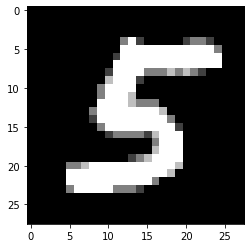

In [69]:
im= X_pca.iloc[[500]].to_numpy().reshape(28,28)
plt.imshow(im, cmap='gray')

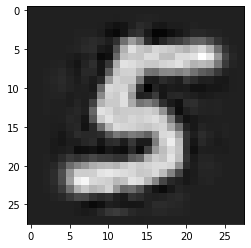

In [68]:
im= X_pca_invt.iloc[[500]].to_numpy().reshape(28,28)
plt.imshow(im, cmap='gray')

In [70]:
y_pca.iloc[[500]]

,0
36729,5


In [71]:
X_data_invt= pca.inverse_transform(X_data_t)

In [73]:
X_data_invt.shape

(47999, 784)

In [75]:
X_data_invt= pd.DataFrame(data=X_data_invt)

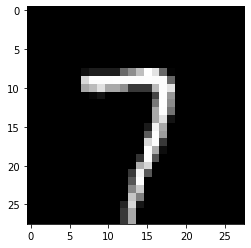

In [77]:
im= X_data.iloc[[500]].to_numpy().reshape(28,28)
plt.imshow(im, cmap='gray')

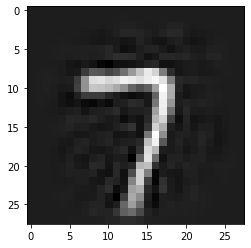

In [76]:
im= X_data_invt.iloc[[500]].to_numpy().reshape(28,28)
plt.imshow(im, cmap='gray')

In [78]:
y_data.iloc[500]

0    7
Name: 32294, dtype: int64